# ``3. Estandarización``

In [5]:
# Lectura de datos
# ==============================================================================
import pickle

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable
from sklearn.preprocessing import OneHotEncoder

# Estadísticos
# ==============================================================================
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


# Librerías para manejar fechas
# ==============================================================================
from datetime import datetime
import calendar

# Desplegar todas las columnas
# ==============================================================================
pd.options.display.max_columns = None

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Test de Shapiro
# ==============================================================================
from scipy import stats

# Asimetría
# ==============================================================================
from scipy.stats import skew

# Curtosis
# ==============================================================================
from scipy.stats import kurtosistest

# Test de Levene
# ==============================================================================
from scipy.stats import levene

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [6]:
df = pd.read_pickle('datos/2.encoding.pkl')
#df = pd.read_csv("datos/4.encoding_oh_final.csv", index_col=0).reset_index(drop=True)
df.head()

,seasons,atemp,hum,windspeed,casual,registered,yryr_0,yryr_1,mnthmnth_1,mnthmnth_2,mnthmnth_3,mnthmnth_4,mnthmnth_5,mnthmnth_6,mnthmnth_7,mnthmnth_8,mnthmnth_9,mnthmnth_10,mnthmnth_11,mnthmnth_12,holiday_numholiday_num_0,holiday_numholiday_num_1,weekday_numweekday_num_0,weekday_numweekday_num_1,weekday_numweekday_num_2,weekday_numweekday_num_3,weekday_numweekday_num_4,weekday_numweekday_num_5,weekday_numweekday_num_6,workingday_numworkingday_num_0,workingday_numworkingday_num_1,weathersitweathersit_1,weathersitweathersit_2,weathersitweathersit_3
0,1,18.18125,80.5833,10.749882,331,654,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,17.68695,69.6087,16.652113,131,670,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,9.47025,43.7273,16.636703,120,1229,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,10.60610,59.0435,10.739832,108,1454,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,11.46350,43.6957,12.522300,82,1518,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Estandarización

In [7]:
numericas= df[['atemp', 'hum', 'windspeed', 'casual', 'registered']]

In [8]:
numericas.columns

Index(['atemp', 'hum', 'windspeed', 'casual', 'registered'], dtype='object')

In [9]:
numericas.head(2)

,atemp,hum,windspeed,casual,registered
0,18.18125,80.5833,10.749882,331,654
1,17.68695,69.6087,16.652113,131,670


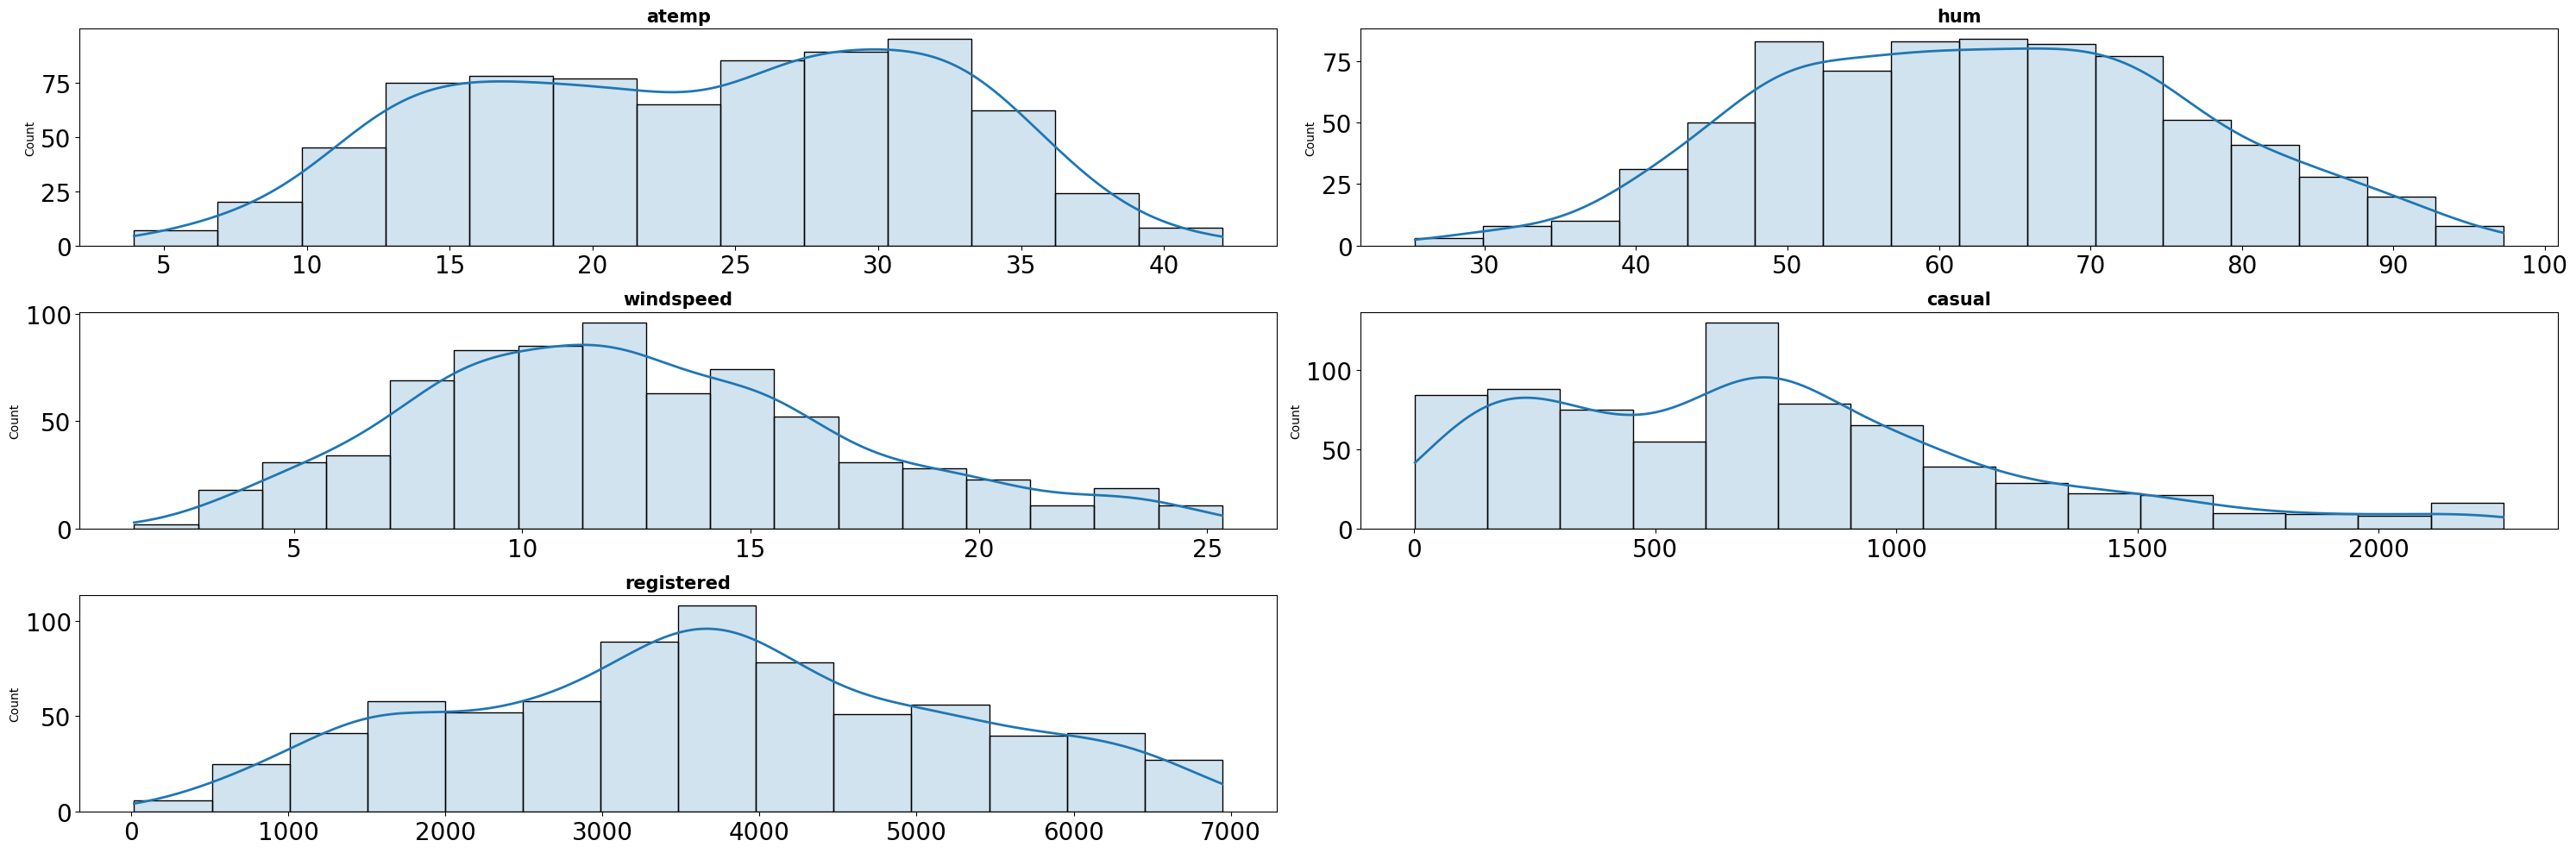

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))

columnas_estandar = numericas.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1]);

## Método Standard scaler

In [11]:
scaler= StandardScaler()

In [12]:
# ajustamos el modelo utilizando nuestro set de datos
scaler.fit(numericas)

StandardScaler()

In [13]:
x_scaler= scaler.transform(numericas)

In [14]:
numericas_scaler= pd.DataFrame(x_scaler,columns=numericas.columns)

In [15]:
columnas_scaler=numericas_scaler.columns

In [16]:
df.drop(columnas_scaler, axis = 1, inplace = True)

In [17]:
df[columnas_scaler] = numericas_scaler[columnas_scaler]

In [18]:
df.head()

,seasons,yryr_0,yryr_1,mnthmnth_1,mnthmnth_2,mnthmnth_3,mnthmnth_4,mnthmnth_5,mnthmnth_6,mnthmnth_7,mnthmnth_8,mnthmnth_9,mnthmnth_10,mnthmnth_11,mnthmnth_12,holiday_numholiday_num_0,holiday_numholiday_num_1,weekday_numweekday_num_0,weekday_numweekday_num_1,weekday_numweekday_num_2,weekday_numweekday_num_3,weekday_numweekday_num_4,weekday_numweekday_num_5,weekday_numweekday_num_6,workingday_numworkingday_num_0,workingday_numworkingday_num_1,weathersitweathersit_1,weathersitweathersit_2,weathersitweathersit_3,atemp,hum,windspeed,casual,registered
0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.680818,1.267606,-0.363437,-0.794278,-1.927745
1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.741507,0.480415,0.874656,-1.190407,-1.917480
2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.750344,-1.376017,0.871424,-1.212194,-1.558846
3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.610886,-0.277410,-0.365545,-1.235962,-1.414494
4,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.505615,-1.378284,0.008358,-1.287459,-1.373434


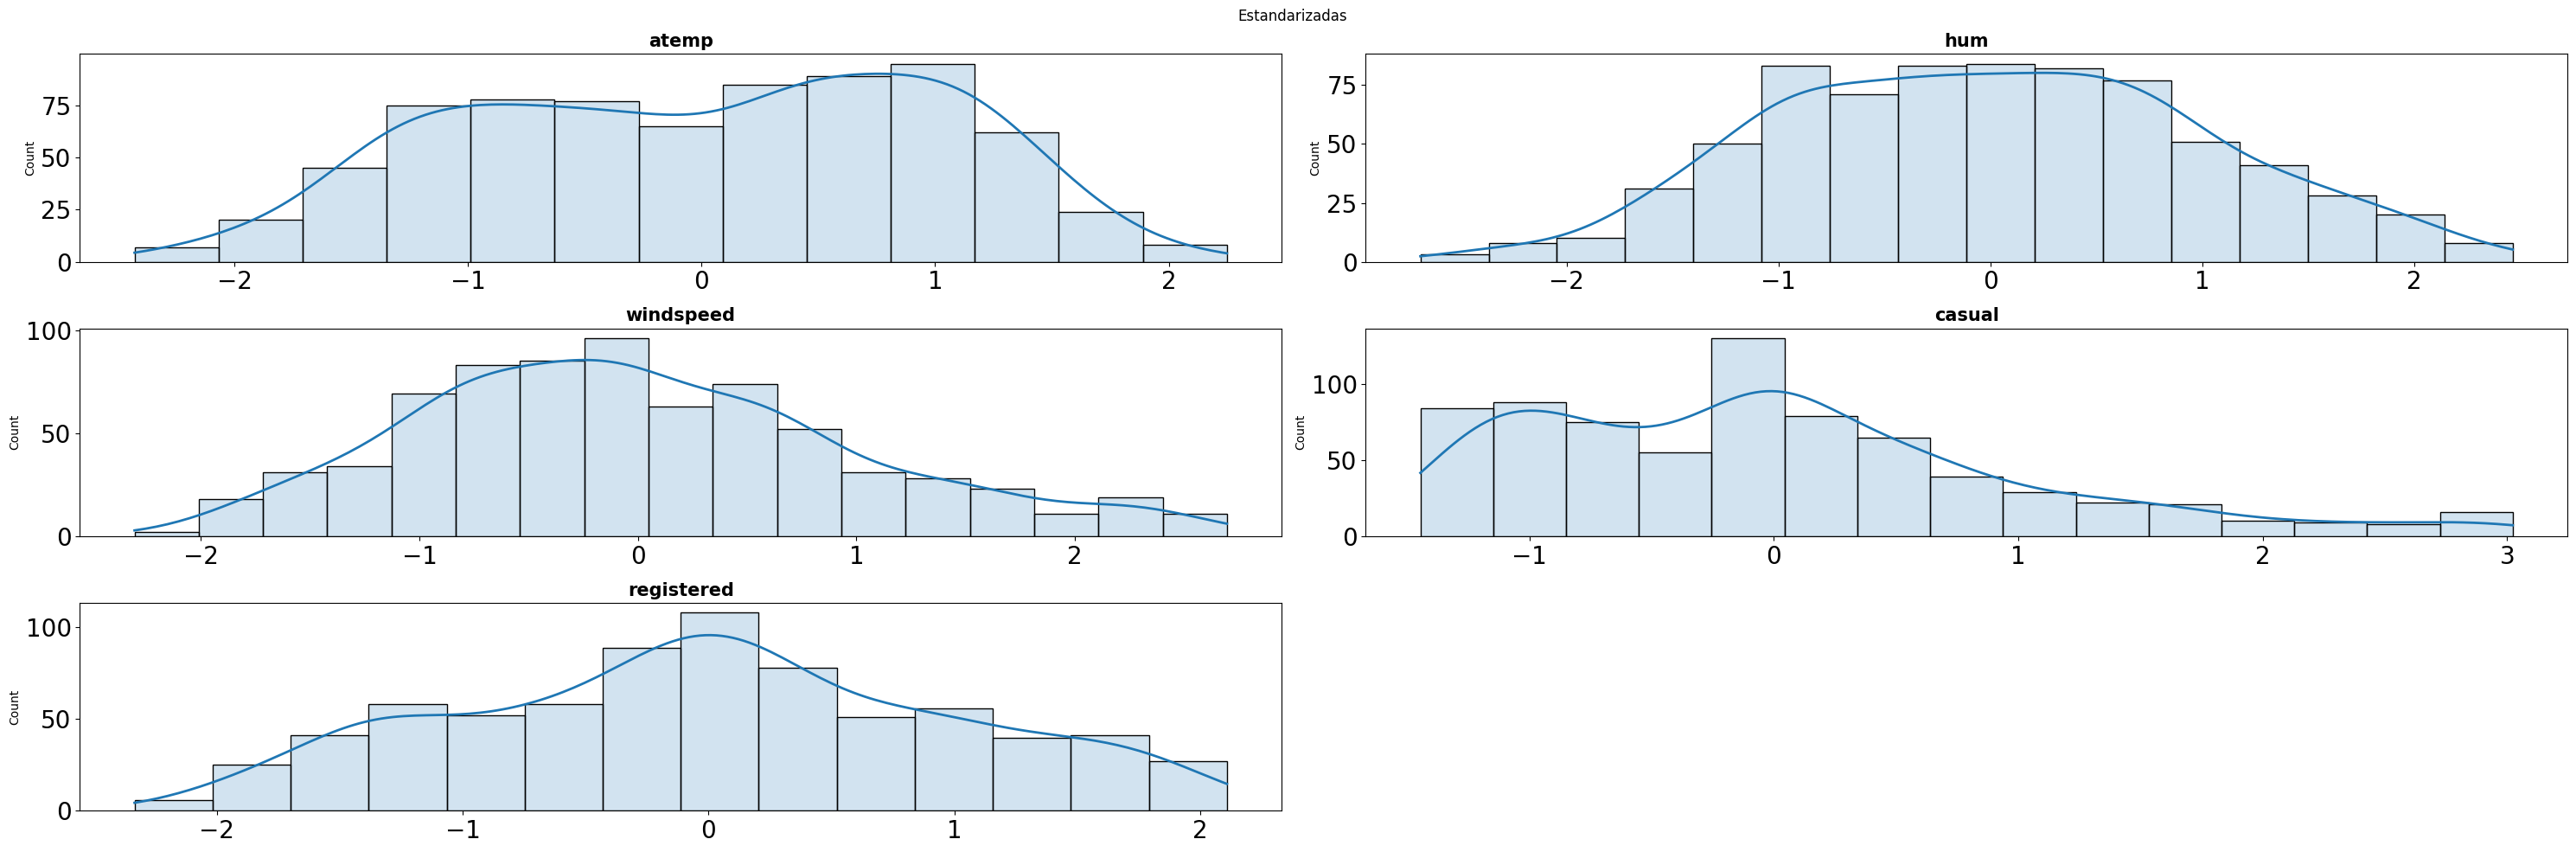

In [19]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))

columnas_estandar = columnas_scaler
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.suptitle('Estandarizadas')
fig.subplots_adjust(top=0.95)
fig.tight_layout()
fig.delaxes(axes[-1]);

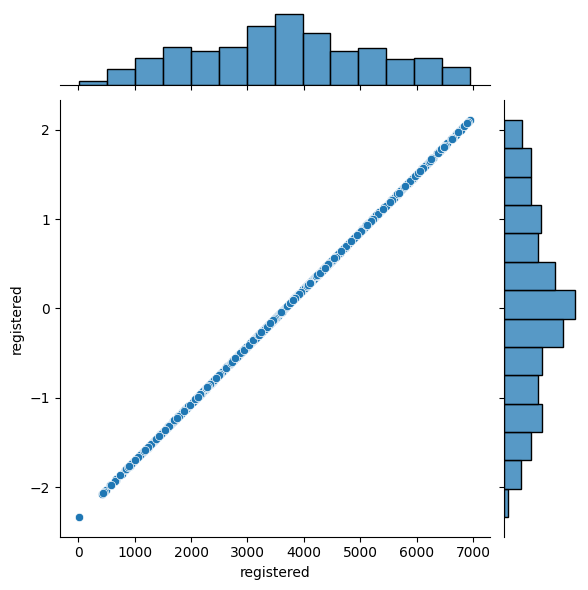

In [20]:
sns.jointplot(x= numericas["registered"], y= numericas_scaler["registered"] )

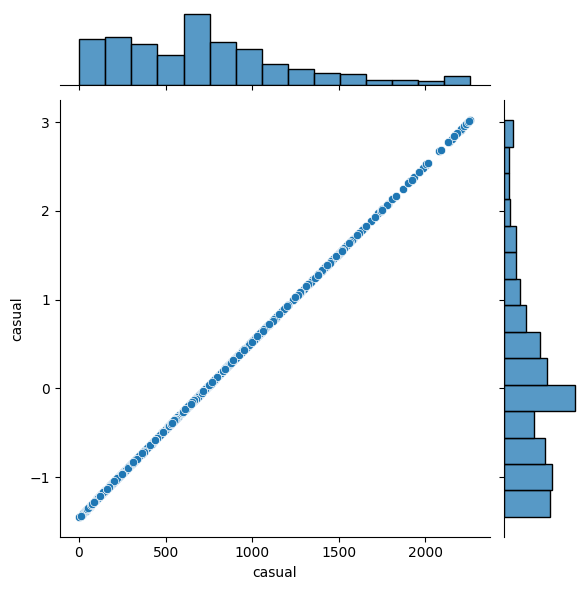

In [21]:
sns.jointplot(x= numericas["casual"], y= numericas_scaler["casual"] )

In [22]:
df.head()

,seasons,yryr_0,yryr_1,mnthmnth_1,mnthmnth_2,mnthmnth_3,mnthmnth_4,mnthmnth_5,mnthmnth_6,mnthmnth_7,mnthmnth_8,mnthmnth_9,mnthmnth_10,mnthmnth_11,mnthmnth_12,holiday_numholiday_num_0,holiday_numholiday_num_1,weekday_numweekday_num_0,weekday_numweekday_num_1,weekday_numweekday_num_2,weekday_numweekday_num_3,weekday_numweekday_num_4,weekday_numweekday_num_5,weekday_numweekday_num_6,workingday_numworkingday_num_0,workingday_numworkingday_num_1,weathersitweathersit_1,weathersitweathersit_2,weathersitweathersit_3,atemp,hum,windspeed,casual,registered
0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.680818,1.267606,-0.363437,-0.794278,-1.927745
1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.741507,0.480415,0.874656,-1.190407,-1.917480
2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.750344,-1.376017,0.871424,-1.212194,-1.558846
3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.610886,-0.277410,-0.365545,-1.235962,-1.414494
4,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.505615,-1.378284,0.008358,-1.287459,-1.373434


In [23]:
# Creamos los df con lo que se trabajará registrados
df_registered = df.drop(['casual'], axis=1)

In [24]:
# Creamos los df con lo que se trabajará casuales
df_casual = df.drop(['registered'], axis=1)

In [25]:
#guardamos en csv y en pkl los df con los datos de registrados:

df_registered.to_csv('datos/3.reg_enc_est.csv')
df_registered.to_pickle('datos/3.reg_enc_est.pkl')

In [26]:
#guardamos en csv y en pkl los df con los datos de registrados:

df_casual.to_csv('datos/3.cas_enc_est.csv')
df_casual.to_pickle('datos/3.cas_enc_est.pkl')

In [27]:
df.to_csv('datos/3.enc_est.csv')
df.to_pickle('datos/3.enc_est.pkl')